In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings # supress warnings
warnings.filterwarnings('ignore')

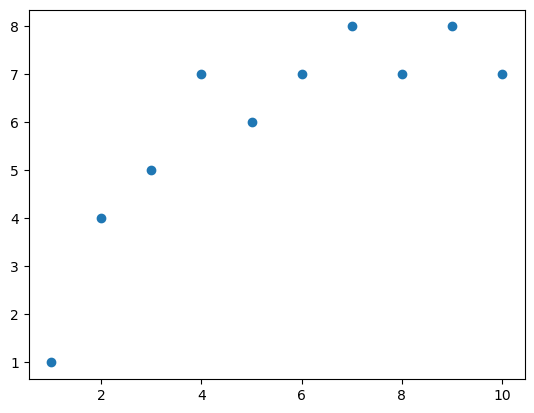

In [2]:
#create x,y arrays
x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([1,4,5,7,6,7,8,7,8,7])

#draw scatter plot
plt.scatter(x,y)

1.4072727272727277
0.6649350649350649


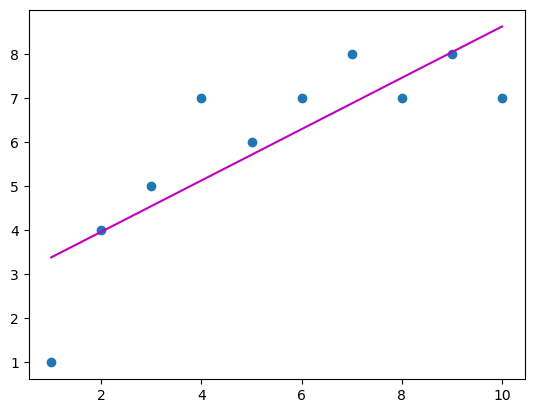

In [3]:
#linear regression
x = x.reshape(-1,1)
y = y.reshape(-1,1)

#train model
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

#plot scatterplot
plt.scatter(x,y)

#plot regression_line
plt.plot(x,y_pred, color='m')

mse=mean_squared_error(y, y_pred)
print(mse)

r2= r2_score(y, y_pred)
print(r2)

<AxesSubplot:>

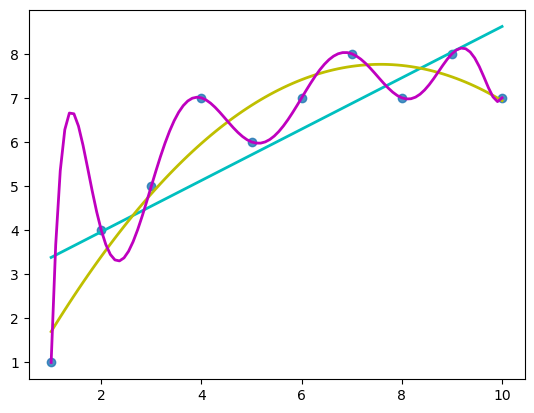

In [5]:
#polynomial regression plots with order 1,2,8

sns.regplot(x=x,y=y,order=1, line_kws={'color': 'c', 'linewidth':2},  ci=None)
sns.regplot(x=x,y=y,order=2, scatter=False, line_kws={'color': 'y', 'linewidth':2}, ci=None)
sns.regplot(x=x,y=y,order=10, scatter=False, line_kws={'color': 'm', 'linewidth':2}, ci=None)

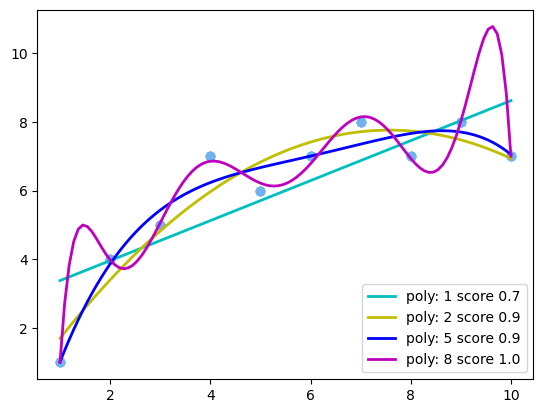

In [11]:
#train polynomial regression models with degrees: 1,2,5,8

degrees = [1,2,5,8]
colors=['c','y','b','m']

model_scores=[]

for i in range(len(degrees)):  
    poly = PolynomialFeatures(degree=degrees[i])
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    y_pred = poly_reg_model.predict(poly_features)
    r2= r2_score(y, y_pred)
   
    plt.scatter(x, y, color='#71b3ef')
    
    sns.regplot(x=x,y=y_pred,order=degrees[i], scatter=False, line_kws={'color': colors[i], 'linewidth':2}, 
                ci=None, label='poly: '+str(degrees[i])+' score '+str(round(r2, 1)))
    
    
plt.legend( loc='lower right')    
plt.show()

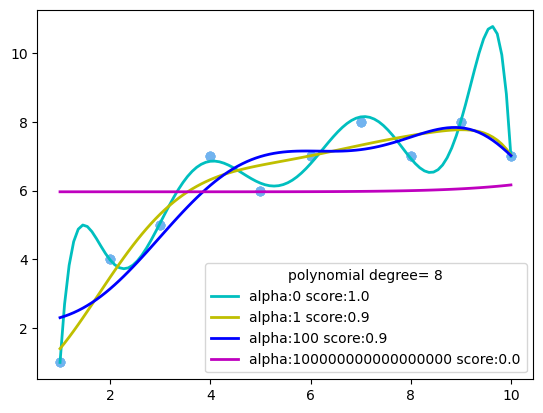

In [8]:
#train polynomial regression model with varying alphas

alphas = [0,1,100, 100000000000000000]
colors=['c','y','b','m']

d=8

model_scores=[]

for i in range(len(alphas)):
    
    poly = PolynomialFeatures(degree=d)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    
    model_ridge = Ridge(alpha = alphas[i])
    model_ridge.fit(poly_features, y)

    
    y_pred = model_ridge.predict(poly_features)
    
    r2= r2_score(y, y_pred)

    plt.scatter(x, y, color='#71b3ef')
    
    sns.regplot(x=x,y=y_pred, order=d, scatter=False, line_kws={'color': colors[i], 'linewidth':2}, 
                ci=None, label='alpha:'+str(alphas[i])+' score:'+str(round(r2, 1)))
    
plt.legend( loc='lower right', title='polynomial degree= 8') 